<a href="https://colab.research.google.com/github/subi-147/TimeSeries_lab/blob/main/TSA_EX_NO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EX.NO:1 Time Series data Cleaning,Loading and preprocessing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Electric_Production.csv", parse_dates=["DATE"], index_col="DATE")
print(data.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [ ]:
data_filled = data.fillna(method='ffill')

<ipython-input-5-6ff098fe28d0>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


In [ ]:
data_cleaned=data_filled.drop_duplicates()

In [ ]:
from scipy.stats import zscore
z_scores = zscore(data_cleaned["IPG2211A2N"])
outliers = abs(z_scores) > 3
data_cleaned.loc[outliers, "IPG2211A2N"] = data_cleaned["IPG2211A2N"].median()

In [ ]:
data_cleaned["Normalized_Value"]=(data_cleaned["IPG2211A2N"] - data_cleaned["IPG2211A2N"].min())/(data_cleaned["IPG2211A2N"].max() - data_cleaned["IPG2211A2N"].min())

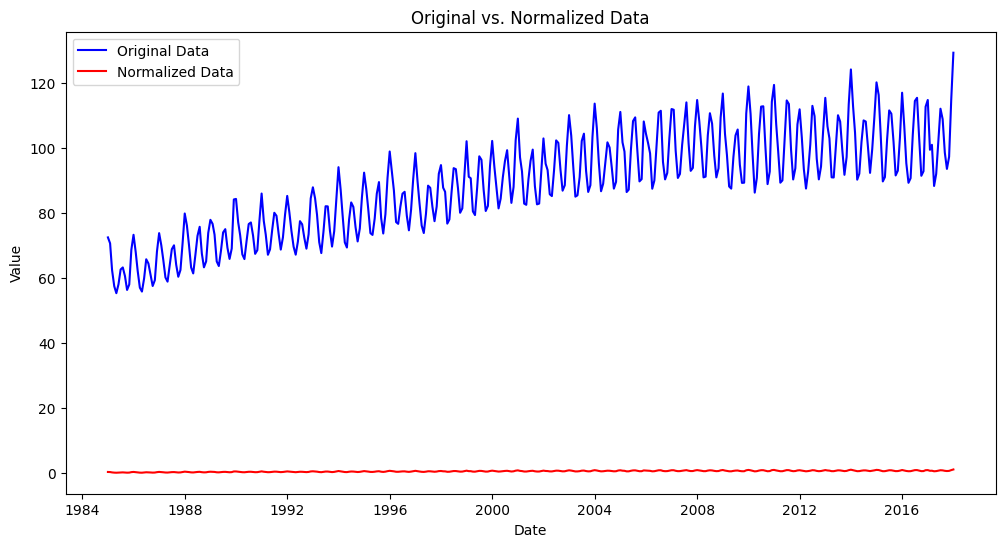

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned["IPG2211A2N"], label="Original Data", color="blue")
plt.plot(data_cleaned.index, data_cleaned["Normalized_Value"], label="Normalized Data", color="red")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Original vs. Normalized Data")
plt.legend()
plt.show()